# DNAm distribution - investigating adding class_weight to the MLP model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading DNAm data

In [4]:
gene_matrix_array = np.load("../init_model/gene_matrix_list.npy")
dnam_features = gene_matrix_array[:, :, 0]
# C:\Users\julia\OneDrive\Documents\Honours2024\Honours\modelling\mlp_model\DNAm_distribution.ipynb
# C:\Users\julia\OneDrive\Documents\Honours2024\Honours\modelling\init_model\gene_matrix_list.npy

In [8]:
# getting class counts for each sample
inner_sums = np.sum(dnam_features, axis=1)

print(inner_sums.shape)

(58780,)


Plotting feature presence in TSS

Text(0, 0.5, 'Frequency')

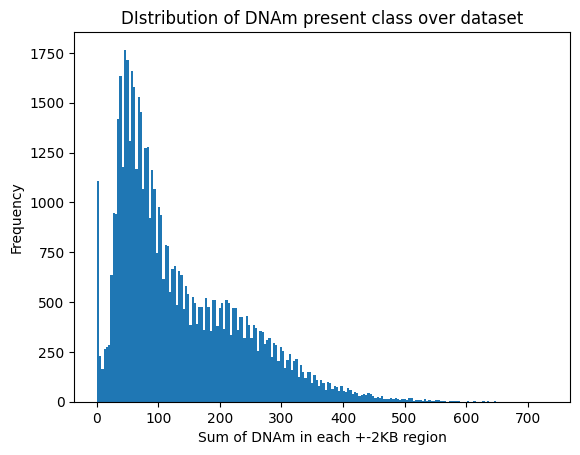

In [14]:
plt.hist(inner_sums, bins=200)
plt.title("DIstribution of DNAm present class over dataset")
plt.xlabel("Sum of DNAm in each +-2KB region")
plt.ylabel("Frequency")

In [17]:
print(np.mean(inner_sums))
print(np.median(inner_sums))

134.7201939435182
101.0


most genes seem to have around 100 or less (which equates to around 2.5% of output values with the True value of 1)

Model is learning to just predict 0

## Repeating the same analysis for K9 and K27 bases under peak

In [2]:
# load dataset and extract K9 and K27
import numpy as np
gene_matrix_array = np.load("../init_model/gene_matrix_list.npy")

h3k9me3_features = gene_matrix_array[:, :, 1]  # Shape (58780, 4000)
h3k27me3_features = gene_matrix_array[:, :, 2]

In [3]:
# getting class counts for each sample
inner_sums_K9 = np.sum(h3k9me3_features, axis=1)
inner_sums_K27 = np.sum(h3k27me3_features, axis=1)

print(inner_sums_K9.shape)
print(inner_sums_K27.shape)

(58780,)
(58780,)


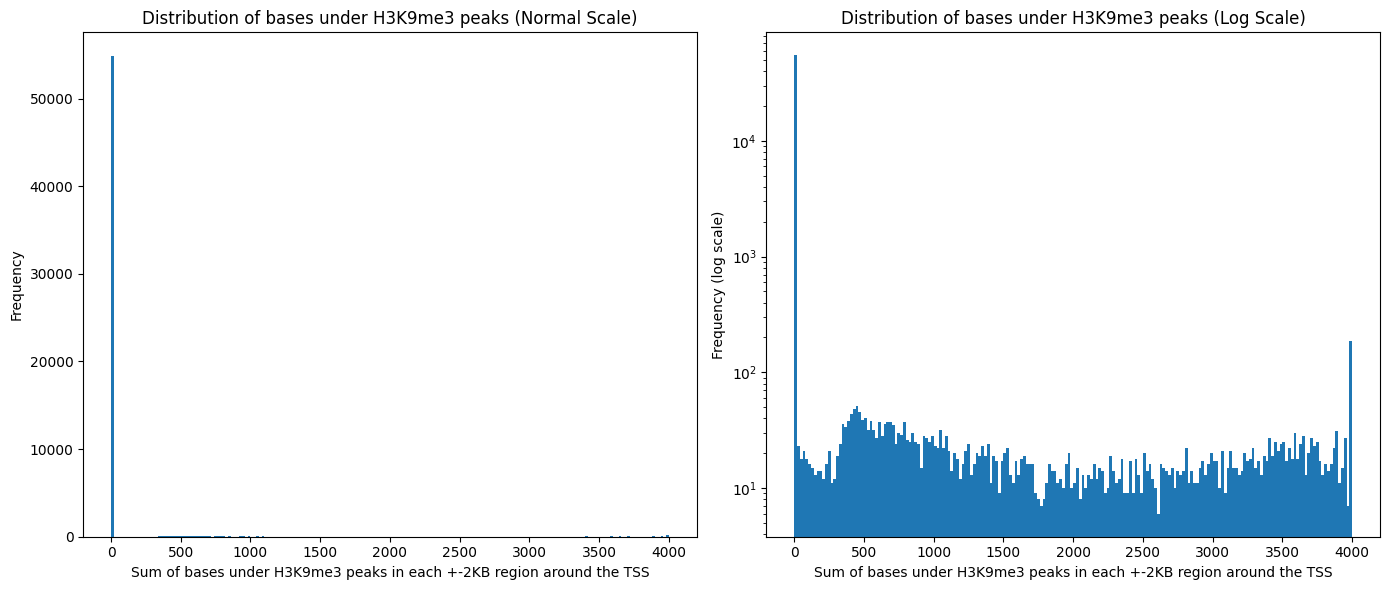

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# normal y-scale
ax[0].hist(inner_sums_K9, bins=200)
ax[0].set_title("Distribution of bases under H3K9me3 peaks (Normal Scale)")
ax[0].set_xlabel("Sum of bases under H3K9me3 peaks in each +-2KB region around the TSS")
ax[0].set_ylabel("Frequency")

# logarithmic y-scale
ax[1].hist(inner_sums_K9, bins=200)
ax[1].set_yscale('log')
ax[1].set_title("Distribution of bases under H3K9me3 peaks (Log Scale)")
ax[1].set_xlabel("Sum of bases under H3K9me3 peaks in each +-2KB region around the TSS")
ax[1].set_ylabel("Frequency (log scale)")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

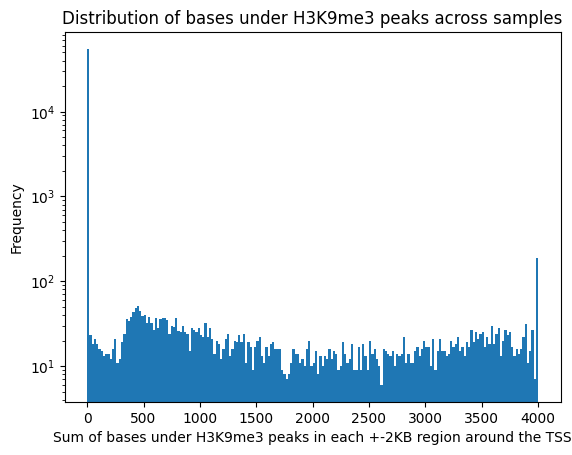

In [5]:
# plotting K9
import matplotlib.pyplot as plt

plt.hist(inner_sums_K9, bins=200)
plt.yscale('log')
plt.title("Distribution of bases under H3K9me3 peaks across samples")
plt.xlabel("Sum of bases under H3K9me3 peaks in each +-2KB region around the TSS")
plt.ylabel("Frequency")

In [7]:
print(np.mean(inner_sums_K9))
print(np.median(inner_sums_K9))

129.07306907111263
0.0


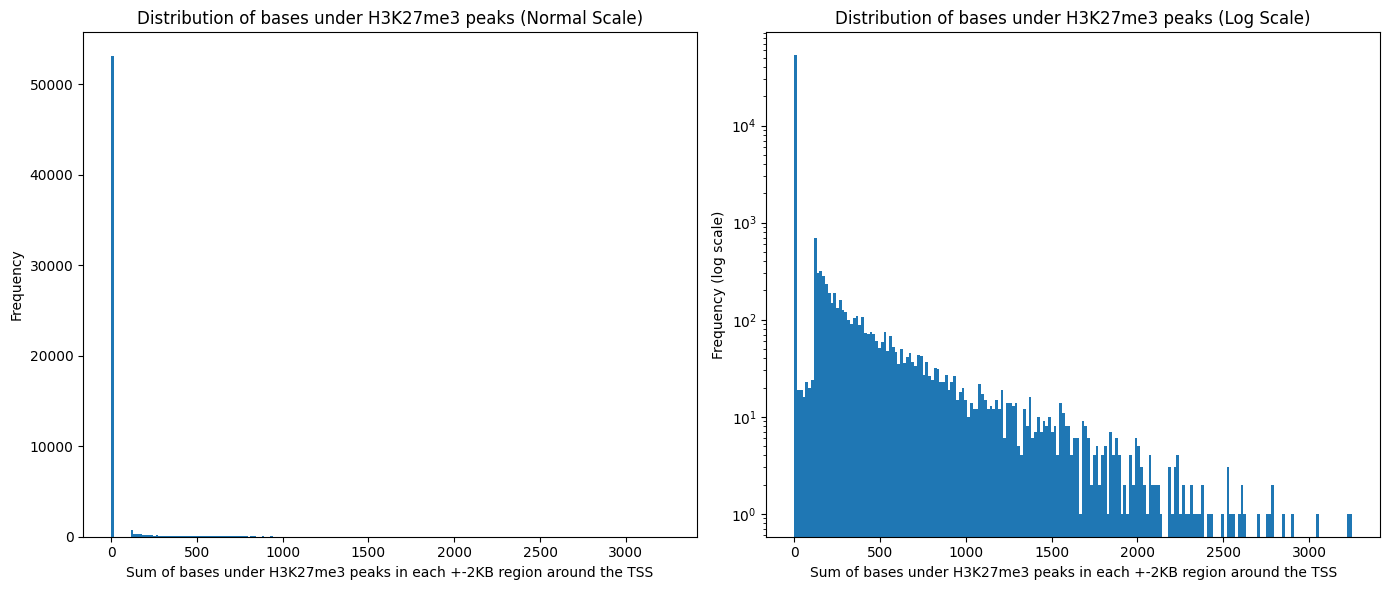

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# normal y-scale
ax[0].hist(inner_sums_K27, bins=200)
ax[0].set_title("Distribution of bases under H3K27me3 peaks (Normal Scale)")
ax[0].set_xlabel("Sum of bases under H3K27me3 peaks in each +-2KB region around the TSS")
ax[0].set_ylabel("Frequency")

# logarithmic y-scale
ax[1].hist(inner_sums_K27, bins=200)
ax[1].set_yscale('log')
ax[1].set_title("Distribution of bases under H3K27me3 peaks (Log Scale)")
ax[1].set_xlabel("Sum of bases under H3K27me3 peaks in each +-2KB region around the TSS")
ax[1].set_ylabel("Frequency (log scale)")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

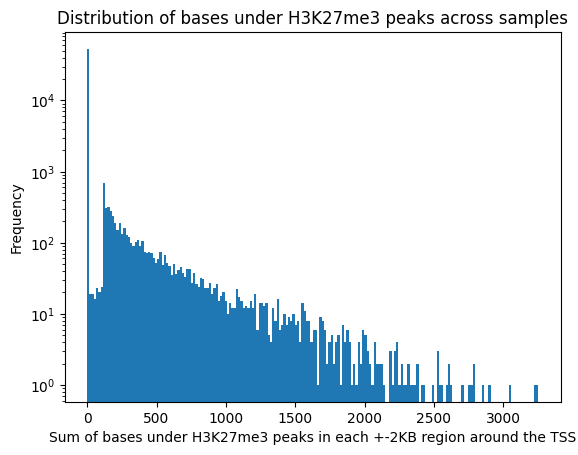

In [6]:
# plotting K27
import matplotlib.pyplot as plt

plt.hist(inner_sums_K27, bins=200)
plt.yscale('log')
plt.title("Distribution of bases under H3K27me3 peaks across samples")
plt.xlabel("Sum of bases under H3K27me3 peaks in each +-2KB region around the TSS")
plt.ylabel("Frequency")

In [8]:
print(np.mean(inner_sums_K27))
print(np.median(inner_sums_K27))

43.509510037427695
0.0
